# <b> <center style="background-color:DodgerBlue;"> PGM - Credit Risk Modelling </center> </b>


#### -*- coding: utf-8 -*-
#### Indentation: Jupyter Notebook

__version__='1.0.0'
__author__="Sourav Raj
__email__="souravraj.iitbbs@gmail.com"

Formulate Bayesian Network Models ( Include deep probabilistic learning Models too)  for modelling credit risk.  Compare the model performance against classical Machine learning models (your choice of model) and deep neural network Model.

## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import random
import warnings
warnings.filterwarnings('ignore')

import matplotlib.image as img


#for data preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

#for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# for class imbalance
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.utils import shuffle
from sklearn.utils import resample

#used for Ml Model
from sklearn.ensemble import RandomForestClassifier

# Used for model Creation 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
import tensorflow_datasets as tfds
import tensorflow_probability as tfp


#for measuring performance of model
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score, roc_auc_score,roc_curve


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import data

In [6]:
path='/content/drive/MyDrive/Multifamily/FNMA_MF_Loan_Performance_Data_202203.csv'
loan_data=pd.read_csv(path)
print(loan_data.shape)
loan_data.head(2)

(4078435, 60)


,Loan Number,Acquisition Date,Note Date,Maturity Date at Acquisition,Loan Acquisition UPB,Amortization Type,Interest Type,Loan Product Type,Original UPB,Amortization Term,...,Modification Indicator,Defeasance Date,Prepayment Provision,Prepayment Provision End Date,Affordable Housing Type,MCIRT Deal ID,MCAS Deal ID,DUS Prepayment Outcomes,DUS Prepayment Segments,Loan Age
0,140296,2000-10-31,1985-07-16,2001-08-10,"$82,501.71",NaN,ARM,DUS,"$82,501.71",NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,140296,2000-10-31,1985-07-16,2001-08-10,"$82,501.71",NaN,ARM,DUS,"$82,501.71",NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Exploration

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078435 entries, 0 to 4078434
Data columns (total 60 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Loan Number                            int64  
 1   Acquisition Date                       object 
 2   Note Date                              object 
 3   Maturity Date at Acquisition           object 
 4   Loan Acquisition UPB                   object 
 5   Amortization Type                      object 
 6   Interest Type                          object 
 7   Loan Product Type                      object 
 8   Original UPB                           object 
 9   Amortization Term                      float64
 10  Original Interest Rate                 float64
 11  Lien Position                          object 
 12  Transaction ID                         object 
 13  Issue Date                             object 
 14  Loan Acquisition LTV                   float64
 15

Statistical summary

In [14]:
loan_data.describe()

,Loan Number,Amortization Term,Original Interest Rate,Loan Acquisition LTV,Underwritten DSCR,Original Term,Original I/O Term,Modified Loss Sharing Percentage,Number of Properties at Acquisition,Property Acquisition Total Unit Count,Physical Occupancy %,Loan Active Property Count,Note Rate,Loan Age
count,4.078435e+06,3.990683e+06,4.078435e+06,4.078242e+06,4.077615e+06,4.078435e+06,1.341935e+06,180058.000000,4.021339e+06,3.997010e+06,3.997010e+06,4.001392e+06,4.074074e+06,2.270170e+06
mean,3.318208e+09,3.246426e+02,5.234506e+00,6.488853e+01,1.772784e+00,1.336276e+02,6.346087e+01,48.650802,1.028037e+00,1.536220e+02,9.075641e+01,1.187385e+00,5.227620e+00,9.762006e+01
std,2.780537e+09,1.017372e+02,1.207463e+00,1.569590e+01,1.826041e+00,5.670734e+01,4.073649e+01,21.189867,6.462416e-01,1.784518e+02,1.733708e+01,2.295784e+00,1.203696e+00,3.527808e+01
min,1.402960e+05,0.000000e+00,1.222000e+00,0.000000e+00,3.900000e-01,1.100000e+01,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.592000e-01,-1.000000e+00
25%,1.712215e+09,3.600000e+02,4.330000e+00,5.780000e+01,1.260000e+00,1.200000e+02,2.400000e+01,25.000000,1.000000e+00,5.200000e+01,9.200000e+01,1.000000e+00,4.330000e+00,7.500000e+01
50%,1.717464e+09,3.600000e+02,5.300000e+00,6.900000e+01,1.400000e+00,1.200000e+02,6.000000e+01,50.000000,1.000000e+00,1.130000e+02,9.500000e+01,1.000000e+00,5.290000e+00,1.040000e+02
75%,8.000984e+09,3.600000e+02,6.000000e+00,7.500000e+01,1.740000e+00,1.200000e+02,1.040000e+02,75.000000,1.000000e+00,2.110000e+02,9.500000e+01,1.000000e+00,6.000000e+00,1.170000e+02
max,8.300008e+09,5.400000e+02,9.800000e+00,2.762000e+02,8.572000e+01,4.800000e+02,3.000000e+02,100.000000,2.700000e+01,1.124600e+04,1.946000e+02,2.300000e+02,1.162000e+01,2.580000e+02


In [13]:
loan_data[loan_data['Loan Number']==140296]

,Loan Number,Acquisition Date,Note Date,Maturity Date at Acquisition,Loan Acquisition UPB,Amortization Type,Interest Type,Loan Product Type,Original UPB,Amortization Term,...,Modification Indicator,Defeasance Date,Prepayment Provision,Prepayment Provision End Date,Affordable Housing Type,MCIRT Deal ID,MCAS Deal ID,DUS Prepayment Outcomes,DUS Prepayment Segments,Loan Age
0,140296,2000-10-31,1985-07-16,2001-08-10,"$82,501.71",NaN,ARM,DUS,"$82,501.71",NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,140296,2000-10-31,1985-07-16,2001-08-10,"$82,501.71",NaN,ARM,DUS,"$82,501.71",NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,140296,2000-10-31,1985-07-16,2001-08-10,"$82,501.71",NaN,ARM,DUS,"$82,501.71",NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,140296,2000-10-31,1985-07-16,2001-08-10,"$82,501.71",NaN,ARM,DUS,"$82,501.71",NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
loan_data['Acquisition Date'].nunique()

5029

Missing Value Analysis

In [16]:
loan_data.isnull().sum()
#No data Missing

Loan Number                                    0
Acquisition Date                               0
Note Date                                      0
Maturity Date at Acquisition                   0
Loan Acquisition UPB                           0
Amortization Type                              8
Interest Type                                  0
Loan Product Type                              0
Original UPB                                   0
Amortization Term                          87752
Original Interest Rate                         0
Lien Position                                 96
Transaction ID                            472276
Issue Date                                475272
Loan Acquisition LTV                         193
Underwritten DSCR                            820
Underwritten DSCR Type                       820
Original Term                                  0
Original I/O Term                        2736500
I/O End Date                             2733418
Loan Ever 60+ Days D

In [17]:
loan_data.columns

Index(['Loan Number', 'Acquisition Date', 'Note Date',
       'Maturity Date at Acquisition', 'Loan Acquisition UPB',
       'Amortization Type', 'Interest Type', 'Loan Product Type',
       'Original UPB', 'Amortization Term', 'Original Interest Rate',
       'Lien Position', 'Transaction ID ', 'Issue Date',
       'Loan Acquisition LTV', 'Underwritten DSCR', 'Underwritten DSCR Type',
       'Original Term', 'Original I/O Term', 'I/O End Date',
       'Loan Ever 60+ Days Delinquent', 'Loss Sharing Type',
       'Modified Loss Sharing Percentage',
       'Number of Properties at Acquisition',
       'Property Acquisition Total Unit Count', 'Specific Property Type',
       'Year Built', 'Property City', 'Property State', 'Property Zip Code',
       'Metropolitan Statistical Area', 'Physical Occupancy %',
       'Liquidation/Prepayment Code', 'Liquidation/Prepayment Date',
       'Foreclosure Date', 'Credit Event Date', 'Foreclosure Value',
       'Lifetime Net Credit Loss Amount', 'Sale

In [18]:
loan_data.drop_duplicates().shape, loan_data['Loan Number'].nunique()

((4078433, 60), 61048)

There are multiple records for the same loan number. we will only take the latest record of loan for further processing. this might ignore some samples where a particular loan has got defaulted earlier but healthy later on. but due to limited resource, we can't consider all.

In [19]:
loan_data['Reporting Period Date']=pd.to_datetime(loan_data['Reporting Period Date'])

In [20]:
loan_data_agg=loan_data.groupby('Loan Number')['Reporting Period Date'].max().reset_index()
print(loan_data_agg.shape)
loan_data_agg.head(2)

(61048, 2)


,Loan Number,Reporting Period Date
0,140296,2001-01-01
1,140297,2001-01-01


Also based on our understanding and data exploration we are only taking below columns with SDQ Indicator as target variable. Loan Payment Status is another variable which can be cosidered as target

In [24]:
columns=['Loan Number', 'Loan Acquisition UPB',
       'Amortization Type', 'Interest Type', 'Loan Product Type', 'Amortization Term', 'Original Interest Rate', 'Original I/O Term',
       'Lien Position','Loan Acquisition LTV', 'Original Term', 'Specific Property Type', 'Year Built',
        'Property State', 'Physical Occupancy %', 'Sale Price', 'Default Amount', 'Reporting Period Date',
       'Loan Active Property Count', 'Note Rate', 'Maturity Date - Current', 'Loan Age', 'UPB - Current', 'SDQ Indicator']

In [25]:
loan_data_unique_loan=loan_data[columns].merge(loan_data_agg, on =['Loan Number', 'Reporting Period Date'])
print(loan_data_unique_loan.shape, loan_data_unique_loan.drop_duplicates().shape)
loan_data_unique_loan.head()

(61048, 24) (61048, 24)


,Loan Number,Loan Acquisition UPB,Amortization Type,Interest Type,Loan Product Type,Amortization Term,Original Interest Rate,Original I/O Term,Lien Position,Loan Acquisition LTV,...,Physical Occupancy %,Sale Price,Default Amount,Reporting Period Date,Loan Active Property Count,Note Rate,Maturity Date - Current,Loan Age,UPB - Current,SDQ Indicator
0,140296,"$82,501.71",NaN,ARM,DUS,NaN,5.196,NaN,First,50.0,...,0.0,NaN,NaN,2001-01-01,1.0,5.610,2001-08-10,NaN,"$82,501.71",Y
1,140297,"$548,872.98",NaN,ARM,DUS,NaN,5.196,NaN,First,50.0,...,0.0,NaN,NaN,2001-01-01,1.0,5.550,2000-08-10,NaN,"$205,587.07",Y
2,1673867584,"$14,725,385.83",Amortizing Balloon,Fixed,DUS,360.0,7.649,NaN,First,80.0,...,92.0,NaN,NaN,2005-04-01,1.0,7.649,2009-12-01,64.0,"$13,900,440.92",N
3,1673867585,"$7,248,775.03",Amortizing Balloon,Fixed,DUS,360.0,7.649,NaN,First,78.0,...,93.0,NaN,NaN,2006-07-01,1.0,7.649,2009-12-01,80.0,"$6,719,583.13",N
4,1673887828,"$6,196,905.91",Amortizing Balloon,Fixed,DUS,360.0,7.700,NaN,First,80.0,...,92.0,NaN,NaN,2010-04-01,1.0,7.700,2010-05-01,NaN,"$5,471,206.20",N


In [ ]:
# loan_data_unique_loan.to_csv('/content/drive/MyDrive/Multifamily/FNMA_Unique_Loan.csv', index=False)

In [3]:
# path=r'G:\bits\Sem3\Probablistic Graphical Model\Assignment\2\Multifamily\FNMA_Unique_Loan.csv'
path='/content/drive/MyDrive/Multifamily/FNMA_Unique_Loan.csv'
loan_data=pd.read_csv(path)

In [4]:
loan_data.head(2)

,Loan Number,Loan Acquisition UPB,Amortization Type,Interest Type,Loan Product Type,Amortization Term,Original Interest Rate,Original I/O Term,Lien Position,Loan Acquisition LTV,...,Physical Occupancy %,Sale Price,Default Amount,Reporting Period Date,Loan Active Property Count,Note Rate,Maturity Date - Current,Loan Age,UPB - Current,SDQ Indicator
0,140296,82501.71,Amortizing Balloon,ARM,DUS,0.0,5.196,0.0,First,50.0,...,0.0,0.0,0.0,2001-01-01,1.0,5.61,2001-08-10,0.0,"$82,501.71",Y
1,140297,548872.98,Amortizing Balloon,ARM,DUS,0.0,5.196,0.0,First,50.0,...,0.0,0.0,0.0,2001-01-01,1.0,5.55,2000-08-10,0.0,"$205,587.07",Y


In [5]:
loan_data.drop_duplicates().shape, loan_data['Loan Number'].nunique()

((61048, 24), 61048)

View statistical summary of dataset 

In [29]:
loan_data.describe()

,Loan Number,Loan Acquisition UPB,Amortization Term,Original Interest Rate,Original I/O Term,Loan Acquisition LTV,Original Term,Year Built,Physical Occupancy %,Sale Price,Default Amount,Loan Active Property Count,Note Rate,Loan Age
count,6.104800e+04,6.104800e+04,61048.000000,61048.000000,61048.000000,61045.000000,61048.000000,61048.000000,61048.000000,6.104800e+04,6.104800e+04,61048.000000,61048.000000,61048.000000
mean,2.831033e+09,1.191111e+07,307.202120,4.777298,29.263285,65.245133,126.830429,1931.282941,88.576619,3.928908e+04,5.602799e+04,1.239779,4.738015,37.134714
std,2.433149e+09,2.292378e+07,124.567515,1.269267,42.094482,14.266319,48.760126,301.919121,21.736815,6.440684e+05,7.874909e+05,2.839687,1.284983,47.557694
min,1.402960e+05,1.144005e+04,0.000000,1.222000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.552000,-1.000000
25%,1.716639e+09,2.500000e+06,360.000000,3.860000,0.000000,59.360000,120.000000,1968.000000,92.000000,0.000000e+00,0.000000e+00,1.000000,3.840000,0.000000
50%,1.717472e+09,5.825000e+06,360.000000,4.680000,0.000000,68.420000,120.000000,1979.000000,95.000000,0.000000e+00,0.000000e+00,1.000000,4.640000,0.000000
75%,1.720004e+09,1.349049e+07,360.000000,5.680000,60.000000,75.000000,120.000000,1995.000000,95.000000,0.000000e+00,0.000000e+00,1.000000,5.650000,78.000000
max,8.300008e+09,9.514950e+08,540.000000,9.800000,300.000000,276.200000,480.000000,2021.000000,194.600000,4.750000e+07,5.500000e+07,230.000000,11.570000,258.000000


In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61048 entries, 0 to 61047
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loan Number                 61048 non-null  int64  
 1   Loan Acquisition UPB        61048 non-null  float64
 2   Amortization Type           61048 non-null  object 
 3   Interest Type               61048 non-null  object 
 4   Loan Product Type           61048 non-null  object 
 5   Amortization Term           61048 non-null  float64
 6   Original Interest Rate      61048 non-null  float64
 7   Original I/O Term           61048 non-null  float64
 8   Lien Position               61047 non-null  object 
 9   Loan Acquisition LTV        61045 non-null  float64
 10  Original Term               61048 non-null  int64  
 11  Specific Property Type      61048 non-null  object 
 12  Year Built                  61048 non-null  float64
 13  Property State              610

Missing Value Analysis

In [31]:
loan_data.isnull().sum()

Loan Number                   0
Loan Acquisition UPB          0
Amortization Type             0
Interest Type                 0
Loan Product Type             0
Amortization Term             0
Original Interest Rate        0
Original I/O Term             0
Lien Position                 1
Loan Acquisition LTV          3
Original Term                 0
Specific Property Type        0
Year Built                    0
Property State                0
Physical Occupancy %          0
Sale Price                    0
Default Amount                0
Reporting Period Date         0
Loan Active Property Count    0
Note Rate                     0
Maturity Date - Current       0
Loan Age                      0
UPB - Current                 0
SDQ Indicator                 0
dtype: int64

### Data Pre-processing and cleaning

In [6]:
columns=['Loan Acquisition UPB',
       'Amortization Type', 'Interest Type', 'Loan Product Type', 'Amortization Term', 'Original Interest Rate', 'Original I/O Term',
       'Lien Position','Loan Acquisition LTV', 'Original Term', 'Specific Property Type', 'Year Built',
        'Property State', 'Physical Occupancy %', 'Sale Price', 'Default Amount', 'Reporting Period Date',
       'Loan Active Property Count', 'Note Rate', 'Maturity Date - Current', 'Loan Age', 'UPB - Current', 'SDQ Indicator']

In [7]:
loan_data['Amortization Type'].fillna(loan_data['Amortization Type'].mode()[0], inplace=True)
loan_data['Original I/O Term'].fillna(0, inplace=True)
loan_data['Amortization Term'].fillna(0, inplace=True)
loan_data['Physical Occupancy %'].fillna(0, inplace=True)
loan_data['Sale Price'].fillna(0, inplace=True)
loan_data['Default Amount'].fillna(0, inplace=True)
loan_data['Loan Active Property Count'].fillna(0, inplace=True)
loan_data['Note Rate'].fillna(loan_data['Note Rate'].median(), inplace=True)
loan_data['Loan Age'].fillna(0, inplace=True)
loan_data['Lien Position'].fillna(loan_data['Lien Position'].mode()[0], inplace=True)
loan_data['Loan Acquisition LTV'].fillna(loan_data['Loan Acquisition LTV'].mean(), inplace=True)

In [8]:
loan_data['Reporting Period Date']=pd.to_datetime(loan_data['Reporting Period Date'])
loan_data['Maturity Date - Current']=pd.to_datetime(loan_data['Maturity Date - Current'])

In [9]:
loan_data['Year Built']=loan_data['Year Built'].apply(lambda x: re.sub("\D", '0',str(x))).astype(float, errors='ignore')

In [10]:
loan_data['Year Built']=loan_data['Year Built']

In [11]:
loan_data['Loan Acquisition UPB']=loan_data['Loan Acquisition UPB'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))
loan_data['Sale Price']=loan_data['Sale Price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')) if x else x)

In [12]:
loan_data['Default Amount']=loan_data['Default Amount'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')) if x else x)

loan_data['UPB - Current']=loan_data['UPB - Current'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')) if x else x)

In [13]:
loan_data['Pending term']=loan_data['Maturity Date - Current'].dt.month-loan_data['Reporting Period Date'].dt.month
loan_data['Year old']=loan_data['Reporting Period Date'].dt.year-loan_data['Year Built']
loan_data.loc[ loan_data['Year old'] >1000, 'Year old'] = 0

### Data Visulization

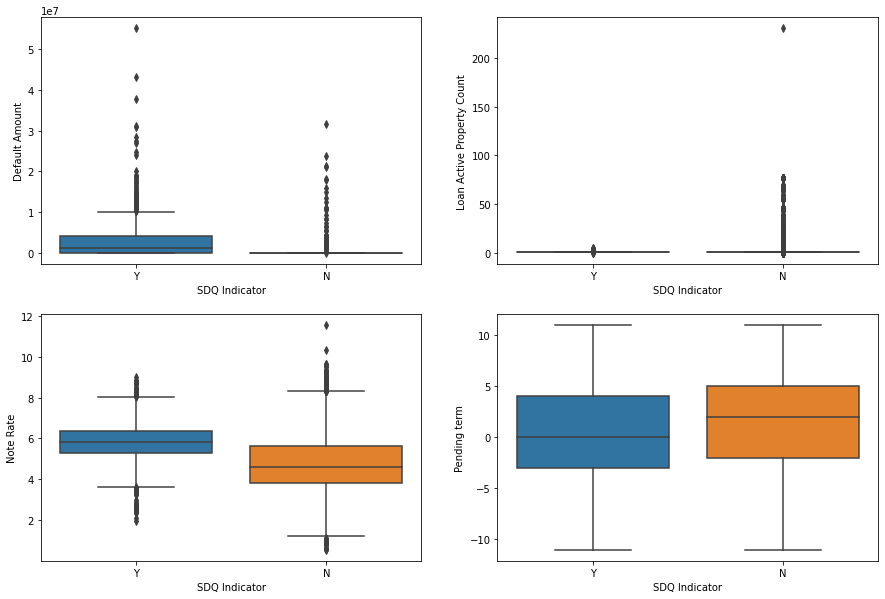

In [26]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['Default Amount', 'Loan Active Property Count', 'Note Rate', 'Pending term']):
    plt.subplot(2, 2, i+1)
    fig = sns.boxplot(x='SDQ Indicator', y=var, data=loan_data)

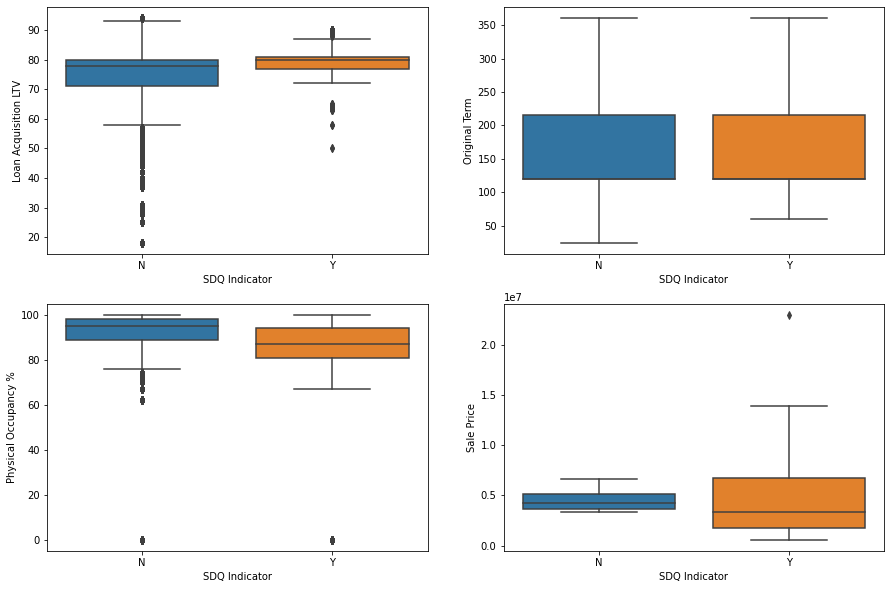

In [ ]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['Loan Acquisition LTV', 'Original Term', 'Physical Occupancy %', 'Sale Price']):
    plt.subplot(2, 2, i+1)
    fig = sns.boxplot(x='SDQ Indicator', y=var, data=loan_data)

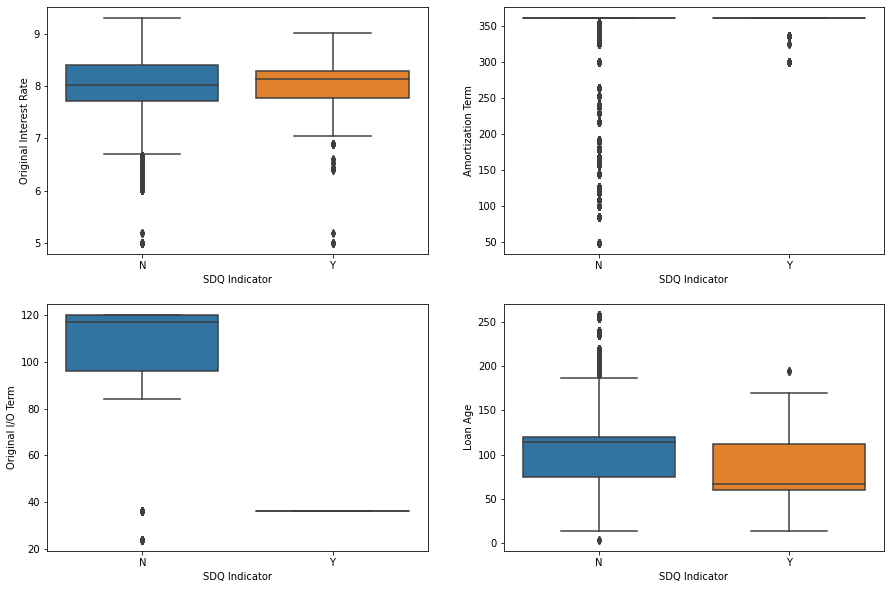

In [ ]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['Original Interest Rate', 'Amortization Term', 'Original I/O Term', 'Loan Age']):
    plt.subplot(2, 2, i+1)
    fig = sns.boxplot(x='SDQ Indicator', y=var, data=loan_data)

<AxesSubplot:xlabel='SDQ Indicator', ylabel='Year old'>

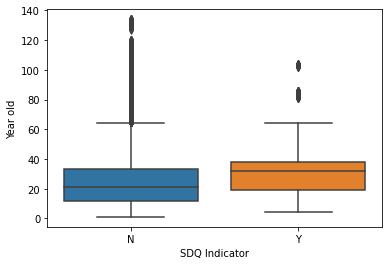

In [ ]:
sns.boxplot(y=loan_data[loan_data['Year old']!=0]['Year old'], x=loan_data['SDQ Indicator'])

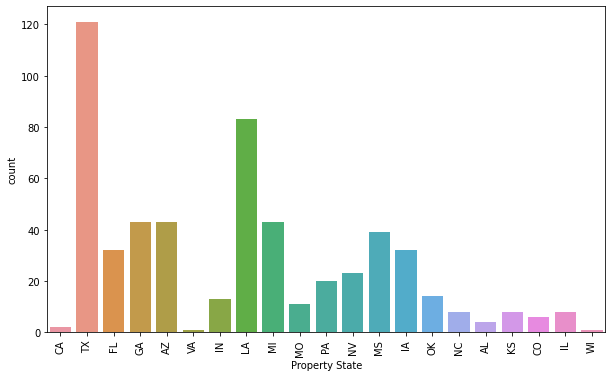

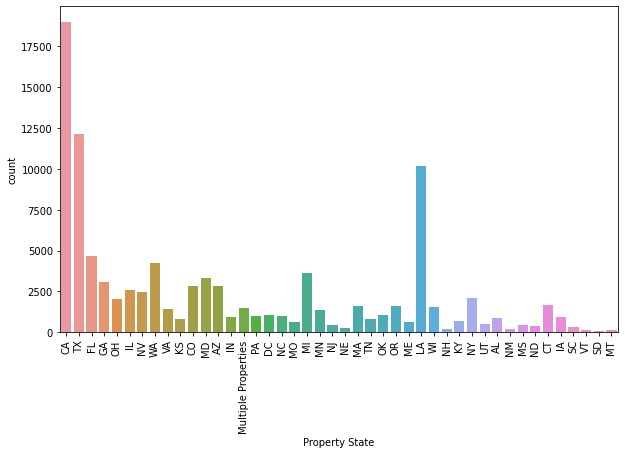

In [ ]:
for col in ['Property State']:
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.countplot(x=col, data=loan_data[loan_data['SDQ Indicator']=='Y'])
    plt.xticks(rotation=90)
    plt.show()
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.countplot(x=col, data=loan_data[loan_data['SDQ Indicator']=='N'])
    plt.xticks(rotation=90)
#     plt.show()

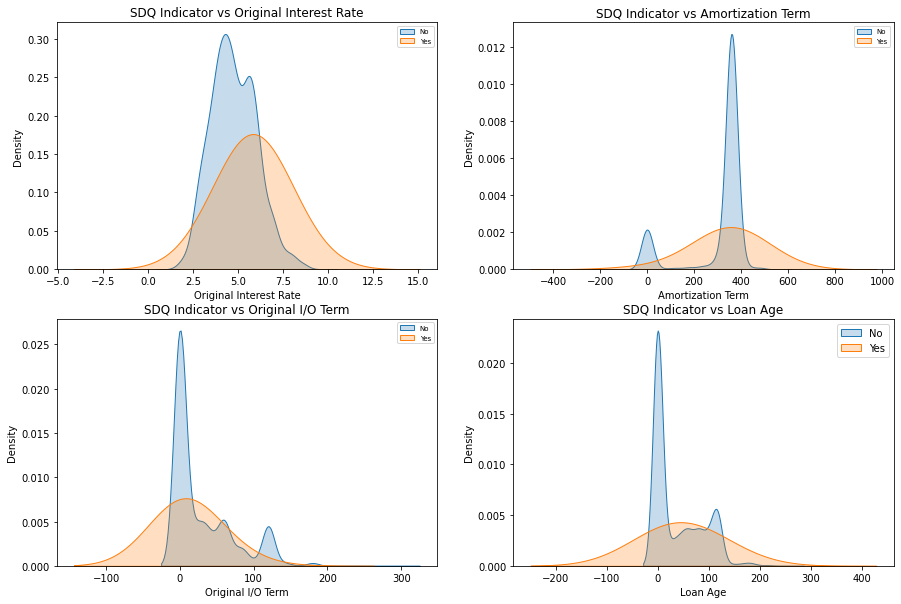

In [45]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['Original Interest Rate', 'Amortization Term', 'Original I/O Term', 'Loan Age']):
    plt.subplot(2, 2, i+1)
    p1=sns.kdeplot(loan_data[loan_data['SDQ Indicator']=='N'][var], bw=.2, label="No",shade=True)
    p2=sns.kdeplot(loan_data[loan_data['SDQ Indicator']=='Y'][var], bw=2, label="Yes",shade=True)

    p1.set_title("SDQ Indicator vs "+var)
    plt.legend(loc="upper right", prop={'size': 7})
    plt.xlabel(var)
plt.legend()

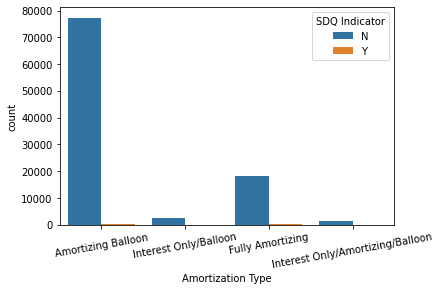

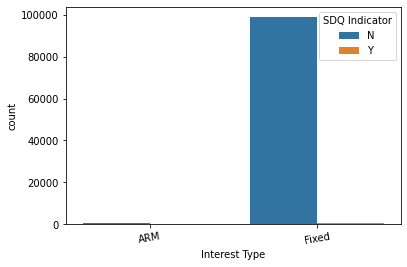

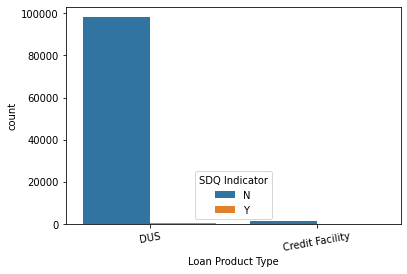

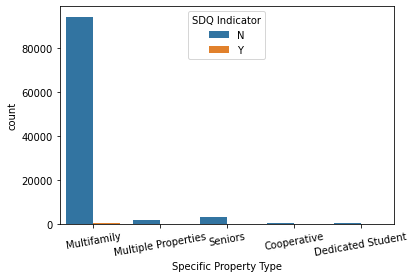

In [ ]:
for col in ['Amortization Type', 'Interest Type', 'Loan Product Type', 'Specific Property Type']:
    fig, ax = plt.subplots(1,1, figsize=(6, 4))
    sns.countplot(x=col, data=loan_data, hue='SDQ Indicator')
    plt.xticks(rotation=10)
#     plt.show()

plt.figure(figsize=(15,10))
for i, var in enumerate(['Amortization Type', 'Interest Type', 'Loan Product Type', 'Specific Property Type']):
    plt.subplot(2, 2, i+1)
    fig=sns.countplot(x=col, data=loan_data, hue='SDQ Indicator')
    plt.xticks(rotation=10)

<AxesSubplot:xlabel='SDQ Indicator', ylabel='count'>

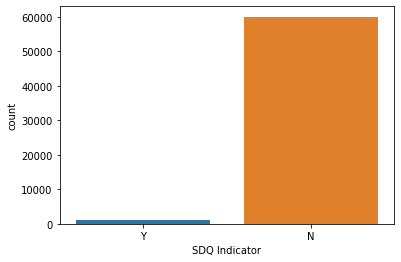

In [ ]:
sns.countplot(loan_data['SDQ Indicator'])

<AxesSubplot:xlabel='SDQ Indicator', ylabel='Loan Acquisition UPB'>

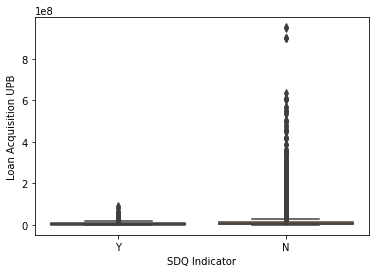

In [ ]:
sns.boxplot(y=loan_data['Loan Acquisition UPB'], x=loan_data['SDQ Indicator'])

 #### Fearure Transformation

In [14]:
#encoding categorical variables to numeric ones
for col in loan_data[columns].columns:
    if loan_data[col].dtype=='object':
        print(col)
        labelEncoder = LabelEncoder()
        loan_data[col] = labelEncoder.fit_transform(loan_data[col])

Amortization Type
Interest Type
Loan Product Type
Lien Position
Specific Property Type
Property State
SDQ Indicator


In [15]:
loan_data[columns].head()

,Loan Acquisition UPB,Amortization Type,Interest Type,Loan Product Type,Amortization Term,Original Interest Rate,Original I/O Term,Lien Position,Loan Acquisition LTV,Original Term,...,Physical Occupancy %,Sale Price,Default Amount,Reporting Period Date,Loan Active Property Count,Note Rate,Maturity Date - Current,Loan Age,UPB - Current,SDQ Indicator
0,82501.71,0,0,2,0.0,5.196,0.0,0,50.0,360,...,0.0,0.0,0.0,2001-01-01,1.0,5.610,2001-08-10,0.0,82501.71,1
1,548872.98,0,0,2,0.0,5.196,0.0,0,50.0,360,...,0.0,0.0,0.0,2001-01-01,1.0,5.550,2000-08-10,0.0,205587.07,1
2,14725385.83,0,1,2,360.0,7.649,0.0,0,80.0,120,...,92.0,0.0,0.0,2005-04-01,1.0,7.649,2009-12-01,64.0,13900440.92,0
3,7248775.03,0,1,2,360.0,7.649,0.0,0,78.0,120,...,93.0,0.0,0.0,2006-07-01,1.0,7.649,2009-12-01,80.0,6719583.13,0
4,6196905.91,0,1,2,360.0,7.700,0.0,0,80.0,120,...,92.0,0.0,0.0,2010-04-01,1.0,7.700,2010-05-01,0.0,5471206.20,0


Feature Scaling

In [16]:
for col in ['Loan Acquisition UPB', 'Amortization Term', 'Original Interest Rate',
       'Loan Acquisition LTV', 'Original Term',  
        'Physical Occupancy %', 'Sale Price', 'Default Amount',
       'Loan Active Property Count', 'Note Rate', 'Original I/O Term', 'Loan Age', 'Pending term', 'Year old', 'UPB - Current']:
    standardScaler = StandardScaler()
    loan_data[col] = standardScaler.fit_transform(loan_data[[col]])


Class Imbalance - OverSampling

In [17]:
loan_data['SDQ Indicator'].value_counts()

0    60019
1     1029
Name: SDQ Indicator, dtype: int64

There is a data imbalance, so let's oversample the data to make it even.

In [18]:
loan_data_No  = loan_data[loan_data['SDQ Indicator']==0]   
loan_data_Yes = loan_data[loan_data['SDQ Indicator']==1]  # one values in outcome column

loan_data_Yes_upsampled = resample(loan_data_Yes, replace = True, n_samples = 60019) 
loan_data = pd.concat([loan_data_No, loan_data_Yes_upsampled])

loan_data = shuffle(loan_data) # shuffling so that there is particular sequence

Correlation Analysis

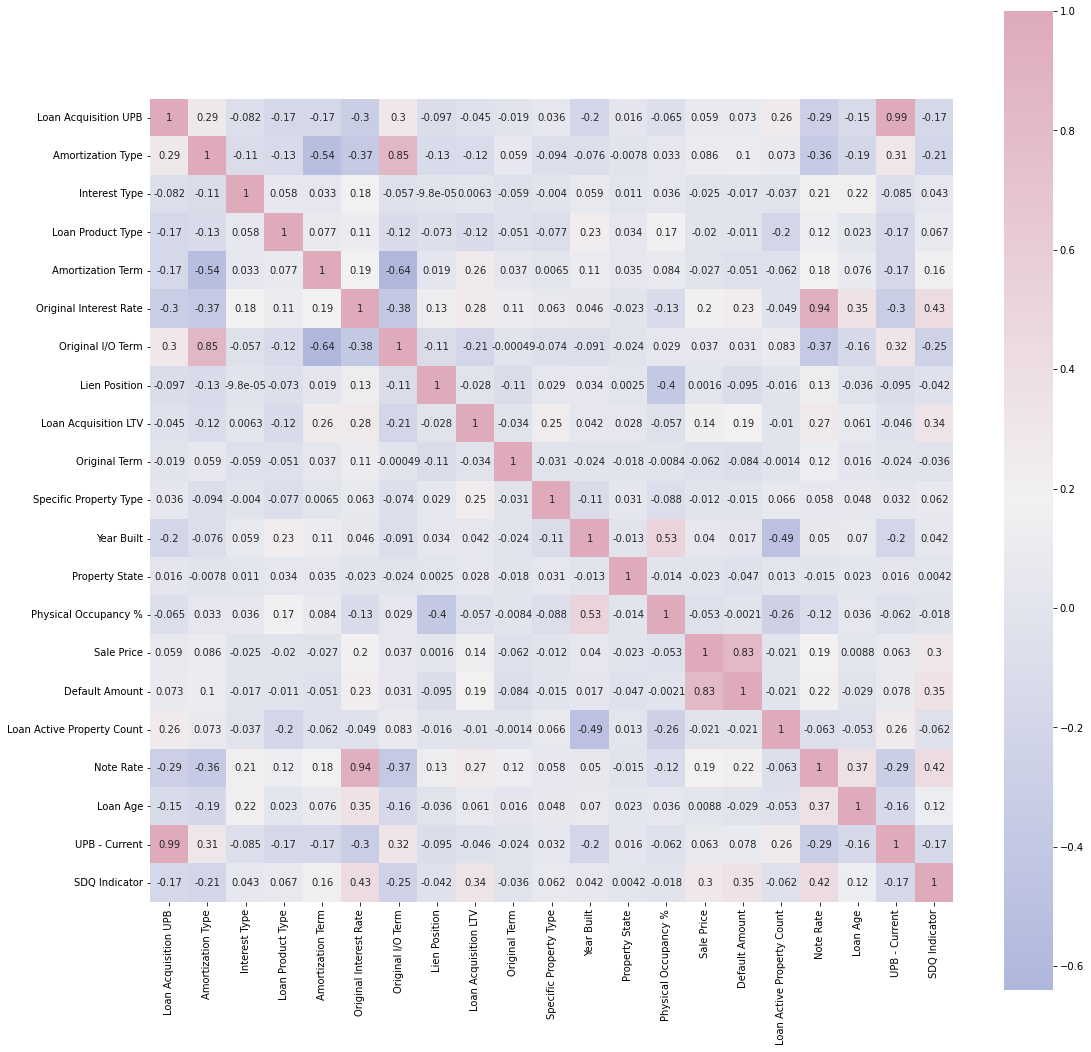

In [33]:
# Correlation amongst numeric attributes
corrmat = loan_data[columns].corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [34]:
#Checking which columns are mostly correlated with the target
loan_data[columns].corr().abs()['SDQ Indicator'].sort_values(ascending = False)

SDQ Indicator                 1.000000
Original Interest Rate        0.428477
Note Rate                     0.420649
Default Amount                0.354286
Loan Acquisition LTV          0.339230
Sale Price                    0.298140
Original I/O Term             0.253063
Amortization Type             0.208888
UPB - Current                 0.172174
Loan Acquisition UPB          0.169857
Amortization Term             0.156249
Loan Age                      0.120359
Loan Product Type             0.066908
Specific Property Type        0.061555
Loan Active Property Count    0.061551
Interest Type                 0.042676
Lien Position                 0.041794
Year Built                    0.041781
Original Term                 0.035810
Physical Occupancy %          0.018348
Property State                0.004222
Name: SDQ Indicator, dtype: float64

In [57]:
loan_data.head()

,Loan Number,Loan Acquisition UPB,Amortization Type,Interest Type,Loan Product Type,Amortization Term,Original Interest Rate,Original I/O Term,Lien Position,Loan Acquisition LTV,...,Default Amount,Reporting Period Date,Loan Active Property Count,Note Rate,Maturity Date - Current,Loan Age,UPB - Current,SDQ Indicator,Pending term,Year old
50447,8000984094,-0.472488,0,1,2,0.423853,2.570561,-0.695187,2,0.749683,...,-0.071148,2010-03-01,-0.084439,2.569692,2010-05-01,1.616267,-0.463890,1,0.116819,-0.215227
9755,1711653552,-0.094712,0,1,2,0.423853,0.829385,-0.695187,0,0.676782,...,-0.071148,2019-09-01,-0.084439,0.849812,2020-06-01,1.511130,-0.133346,1,-0.933638,-0.241695
58277,8300002107,-0.488715,0,1,2,0.423853,1.404525,-0.695187,2,0.866045,...,0.774658,2013-02-01,-0.084439,1.417917,2017-02-01,0.438740,-0.477386,1,-0.303364,-0.171628
39033,1717480661,0.350682,2,1,2,0.423853,-0.935428,0.730190,0,0.683791,...,-0.071148,2022-03-01,-0.084439,-0.893416,2031-09-01,-0.780841,0.383180,0,0.957184,-0.124481
44162,1720002004,-0.120449,2,1,2,0.423853,-1.423903,0.730190,0,-0.087281,...,-0.071148,2022-03-01,-0.084439,-1.375916,2031-02-01,-0.780841,-0.098809,0,-0.513455,-0.101059


### Data Preparation

In [19]:
allColumns=['Loan Acquisition UPB',
       'Amortization Type', 'Interest Type', 'Loan Product Type', 'Amortization Term', 'Original Interest Rate', 'Original I/O Term',
       'Lien Position','Loan Acquisition LTV', 'Original Term', 'Specific Property Type', 
        'Property State', 'Physical Occupancy %', 'Sale Price', 'Default Amount', 
       'Loan Active Property Count', 'Note Rate', 'Loan Age', 'UPB - Current', 'Pending term', 'Year old', 'SDQ Indicator']

In [20]:
X = loan_data[allColumns].drop(['SDQ Indicator'], axis = 1)
y = loan_data[allColumns]['SDQ Indicator']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

### Model Building & Evaluation

### 1. Bayessian Network Model (with Deep Probabilistic Model)

Defining Prior & Posterior distribution of weights.

In [99]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the we prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model

# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

BNN Model Creation & Compilation

In [100]:
def create_bnn_model(input_shape, hidden_units, train_size):
    # input_shape=X_train.shape[1]
    inputs = Input(shape=(input_shape,))
    features = layers.BatchNormalization()(inputs)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    # The output is deterministic: a single point estimate.
    outputs = Dense(units=1)(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [102]:
#model creation
batch_size = 256
hidden_units = [40, 10]
learning_rate = 0.001
train_size=X_train.shape[0]
input_shape=X_train.shape[1]
# train_sample_size = int(X_train.shape[0] * 0.3)
bnn_model = create_bnn_model(input_shape, hidden_units, train_size)

In [104]:
# model Compilation
adam=Adam(learning_rate=learning_rate)
bnn_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
bnn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 21)]              0         
                                                                 
 batch_normalization_2 (Batc  (None, 21)               84        
 hNormalization)                                                 
                                                                 
 dense_variational_2 (DenseV  (None, 40)               388520    
 ariational)                                                     
                                                                 
 dense_variational_3 (DenseV  (None, 10)               84665     
 ariational)                                                     
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                           

Model training

In [106]:
bnn_model_hist=bnn_model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.5492 - accuracy: 0.7429 - val_loss: 0.5330 - val_accuracy: 0.7407
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.5294 - accuracy: 0.7426 - val_loss: 0.5181 - val_accuracy: 0.7494
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.5210 - accuracy: 0.7516 - val_loss: 0.5006 - val_accuracy: 0.7617
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.5074 - accuracy: 0.7620 - val_loss: 0.4972 - val_accuracy: 0.7691
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.5150 - accuracy: 0.7643 - val_loss: 0.4991 - val_accuracy: 0.7700
Epoch 6/100
352/352 [==============================] - 2s 5ms/step - loss: 0.5041 - accuracy: 0.7623 - val_loss: 0.5029 - val_accuracy: 0.7520
Epoch 7/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4899 - accuracy: 0.7671 - val_loss: 0.4841 - val_accuracy: 0.7767

Loss Curve

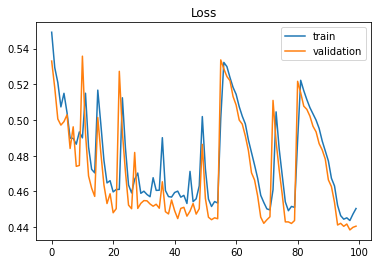

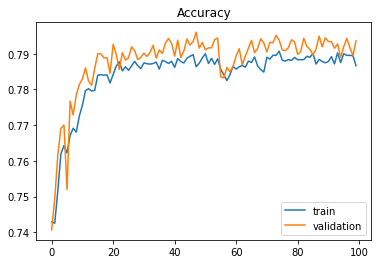

In [107]:
plt.title(f'Loss')
plt.plot(bnn_model_hist.history['loss'], label='train')
plt.plot(bnn_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(bnn_model_hist.history['accuracy'], label='train')
plt.plot(bnn_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [108]:
y_pred = (bnn_model.predict(X_test)>0.5).astype("int32")
_accuracy = accuracy_score(y_test, y_pred)
_f1_score = f1_score(y_test, y_pred)
cm_=confusion_matrix(y_test, y_pred)
clReport=classification_report(y_test, y_pred)
print('Deep Learning Model - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))
print('Confusion Matrix: ')
print('................')
print(cm_)
print(clReport)

Deep Learning Model - accuracy score: 0.7908363878707098 and f1_score: 0.7600810304628675
Confusion Matrix: 
................
[[13790  1215]
 [ 5062  9943]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81     15005
           1       0.89      0.66      0.76     15005

    accuracy                           0.79     30010
   macro avg       0.81      0.79      0.79     30010
weighted avg       0.81      0.79      0.79     30010



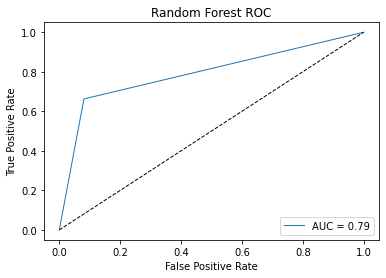

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right", frameon = True).get_frame()

#### 2. Machine Learning Model

In [92]:
#Construct decision tree
rf_model = RandomForestClassifier(n_estimators=20, min_samples_split=3,  min_samples_leaf= 3, max_depth=5, 
                                  criterion='entropy', bootstrap=True)
rf_model.fit(X_train, y_train)

#Use the decision tree for prediction on test data
y_pred = rf_model.predict(X_test)

In [93]:
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n") 
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
clReport_RF=classification_report(y_test, y_pred)
print("Classification Report \n: ", clReport_RF)

Accuracy :  82.50916361212929 

Confusion Matrix : 
 [[14842   163]
 [ 5086  9919]]
Classification Report 
:                precision    recall  f1-score   support

           0       0.74      0.99      0.85     15005
           1       0.98      0.66      0.79     15005

    accuracy                           0.83     30010
   macro avg       0.86      0.83      0.82     30010
weighted avg       0.86      0.83      0.82     30010



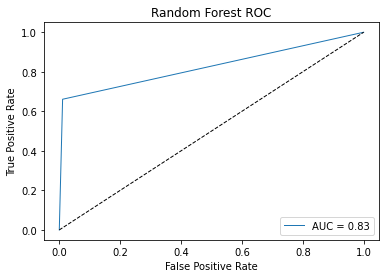

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right", frameon = True).get_frame()

In [110]:
importance_feature=pd.Series(rf_model.feature_importances_, index=allColumns[:-1]).sort_values(ascending=False)
importance_feature

Default Amount                0.352122
Sale Price                    0.226009
Note Rate                     0.120205
Loan Age                      0.073224
Original Interest Rate        0.066143
Original I/O Term             0.037870
Loan Acquisition LTV          0.037606
Property State                0.019842
Year old                      0.012525
Specific Property Type        0.011336
Pending term                  0.010172
Amortization Type             0.009017
Loan Acquisition UPB          0.005727
Physical Occupancy %          0.005633
Amortization Term             0.004529
UPB - Current                 0.003512
Original Term                 0.001835
Lien Position                 0.001119
Interest Type                 0.000671
Loan Product Type             0.000670
Loan Active Property Count    0.000232
dtype: float64

#### 3. Deep Neural Network Model

Early stopping

In [68]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Model Creation & Compile

In [69]:
dl_model = Sequential()
# layers
dl_model.add(Dense(units = 30,  activation = 'relu', input_dim = X_train.shape[1]))
dl_model.add(Dense(units = 10,  activation = 'relu'))
dl_model.add(Dropout(0.2))
dl_model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.001)
dl_model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
dl_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                660       
                                                                 
 dense_13 (Dense)            (None, 10)                310       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


Model training

In [70]:
# Fit the model
dl_history = dl_model.fit(X_train, y_train, epochs=50, batch_size=250, 
                     validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/50
361/361 [==============================] - 2s 4ms/step - loss: 0.4795 - binary_accuracy: 0.7488 - val_loss: 0.3768 - val_binary_accuracy: 0.8058
Epoch 2/50
361/361 [==============================] - 1s 4ms/step - loss: 0.3801 - binary_accuracy: 0.8019 - val_loss: 0.3558 - val_binary_accuracy: 0.8160
Epoch 3/50
361/361 [==============================] - 1s 3ms/step - loss: 0.3637 - binary_accuracy: 0.8122 - val_loss: 0.3428 - val_binary_accuracy: 0.8306
Epoch 4/50
361/361 [==============================] - 1s 4ms/step - loss: 0.3521 - binary_accuracy: 0.8214 - val_loss: 0.3344 - val_binary_accuracy: 0.8313
Epoch 5/50
361/361 [==============================] - 1s 4ms/step - loss: 0.3414 - binary_accuracy: 0.8280 - val_loss: 0.3181 - val_binary_accuracy: 0.8441
Epoch 6/50
361/361 [==============================] - 1s 4ms/step - loss: 0.3286 - binary_accuracy: 0.8360 - val_loss: 0.3111 - val_binary_accuracy: 0.8478
Epoch 7/50
361/361 [==============================] - 1s 3ms/ste

Loss Curve

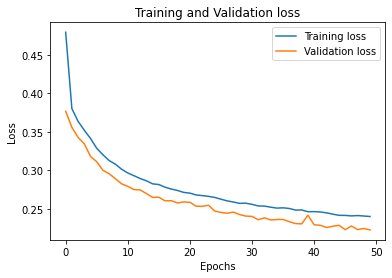

In [71]:
history_df = pd.DataFrame(dl_history.history)

plt.plot(dl_history.history['loss'], label='Training loss')
plt.plot(dl_history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

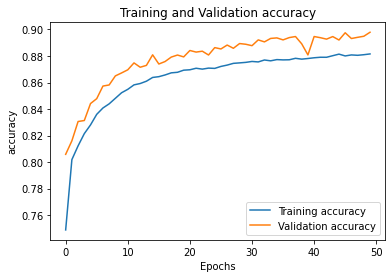

In [73]:
history_df = pd.DataFrame(dl_history.history)

plt.plot(dl_history.history['binary_accuracy'], label='Training accuracy')
plt.plot(dl_history.history['val_binary_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

Performance Evaluation

In [76]:
y_pred = (dl_model.predict(X_test)>0.5).astype("int32")
_accuracy = accuracy_score(y_test, y_pred)
_f1_score = f1_score(y_test, y_pred)
cm_=confusion_matrix(y_test, y_pred)
clReport=classification_report(y_test, y_pred)
print('Deep Learning Model - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))
print('Confusion Matrix: ')
print('................')
print(cm_)
print(clReport)

Deep Learning Model - accuracy score: 0.8979006997667445 and f1_score: 0.8953837749248839
Confusion Matrix: 
................
[[13834  1171]
 [ 1893 13112]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15005
           1       0.92      0.87      0.90     15005

    accuracy                           0.90     30010
   macro avg       0.90      0.90      0.90     30010
weighted avg       0.90      0.90      0.90     30010



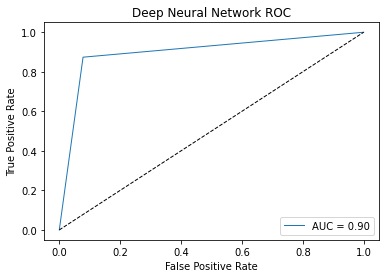

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Neural Network ROC')
plt.legend(loc="lower right", frameon = True).get_frame()

In [71]:
!pip install torchbnn
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Analyzing the parameter relationship & Creating bayesian network model

In [22]:
from itertools import combinations

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score,BDeuScore,BicScore,BDsScore
from pgmpy.sampling import BayesianModelSampling

Identified relationship from the data based on our understanding

In [38]:
# 'Loan Acquisition UPB' -> 'Original Term'
# 'Loan Product Type' -> 'Amortization Type' -> 'Amortization Term'
# 'Loan Product Type' -> 'Interest Type' -> 'Original Interest Rate'
# 'Loan Product Type' -> 'Original Term' -> 'Original I/O Term'
# 'Original Interest Rate' -> 'Note Rate'
# 'Year old' -> 'Loan Acquisition UPB'
# 'Property State' -> 'Loan Acquisition UPB' 
# 'Loan Acquisition UPB' -> 'UPB - Current'
# 'Original Term' -> 'UPB - Current'
# 'Year old' -> 'Physical Occupancy %'
# 'Property State' ->   'Physical Occupancy %'
# 'Property State' -> 'Sale Price'
# 'Year old' -> 'Sale Price'
# 'Loan Age' -> 'UPB - Current'
# 'Pending term' -> 'Default Amount'
# 'Pending term' -> 'SDQ Indicator'
# 'UPB - Current' -> 'SDQ Indicator'
# 'Default Amount' -> 'SDQ Indicator'
# 'Original Interest Rate' -> 'SDQ Indicator'

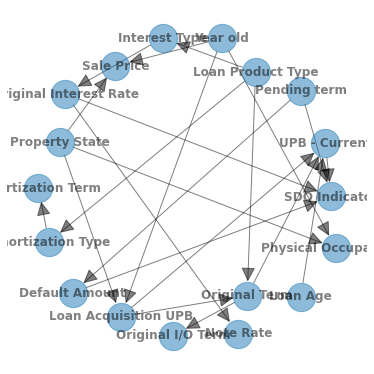

In [23]:
# Model Baysian Network
model = BayesianModel([('Loan Acquisition UPB', 'Original Term'), ('Loan Product Type', 'Amortization Type'), \
                       ('Loan Product Type', 'Interest Type'), ('Loan Product Type', 'Original Term'), \
                       ('Amortization Type', 'Amortization Term'), ('Interest Type', 'Original Interest Rate'), \
                       ('Original Term', 'Original I/O Term'),  ('Original Interest Rate', 'Note Rate'), \
                       ('Year old', 'Loan Acquisition UPB'), ('Property State', 'Loan Acquisition UPB'), \
                       ('Loan Acquisition UPB', 'UPB - Current'), ('Original Term', 'UPB - Current'), \
                       ('Year old', 'Physical Occupancy %'), ('Property State', 'Physical Occupancy %'), \
                       ('Property State', 'Sale Price'), ('Year old', 'Sale Price'), ('Loan Age', 'UPB - Current'), \
                       ('Pending term' , 'Default Amount'), ('Pending term', 'SDQ Indicator'), \
                       ('UPB - Current' , 'SDQ Indicator'), ('Default Amount', 'SDQ Indicator'), \
                       ('Original Interest Rate', 'SDQ Indicator') \
                      ])

plt.figure(1,figsize=(5,5))
nx.draw(model, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold")
plt.show()

Trying to understand & validate the impact of parameter on identified target class (SDQ Indicator)

In [24]:
idx=int(0.8*loan_data.shape[0])
loan_data_train=loan_data[allColumns].iloc[:idx].head(100)
loan_data_test=loan_data[allColumns].iloc[idx:]

In [25]:
model.fit(loan_data_train, estimator=MaximumLikelihoodEstimator)

In [26]:
# Inferencing with Bayesian Network
print('\nInferencing with Bayesian Network:')
loan_infer = VariableElimination(model)


Inferencing with Bayesian Network:


In [46]:
q = loan_infer.query(variables=['SDQ Indicator'], evidence={'Pending term': 7})
print(q)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

0.5

Based on our understanding we create bayessian network to learn the relationshil. This is taking a lot of time based on the available resource so only took limited records for parameter learning so result coming is not that great.

Structural Learning based on HillClimbSearch & BDeuScore

  0%|          | 0/20 [00:00<?, ?it/s]

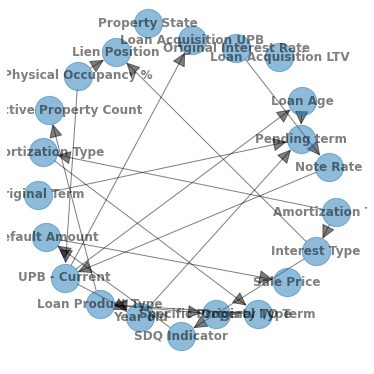

[('Amortization Type', 'Original I/O Term'), ('Interest Type', 'SDQ Indicator'), ('Interest Type', 'Lien Position'), ('Loan Product Type', 'Specific Property Type'), ('Loan Product Type', 'Loan Active Property Count'), ('Amortization Term', 'Amortization Type'), ('Amortization Term', 'Interest Type'), ('Original Interest Rate', 'Note Rate'), ('Original I/O Term', 'Loan Product Type'), ('Original Term', 'Pending term'), ('Physical Occupancy %', 'UPB - Current'), ('Physical Occupancy %', 'Lien Position'), ('Default Amount', 'Sale Price'), ('Note Rate', 'UPB - Current'), ('Loan Age', 'Pending term'), ('UPB - Current', 'Loan Acquisition UPB'), ('UPB - Current', 'Year old'), ('UPB - Current', 'Loan Age'), ('SDQ Indicator', 'Default Amount'), ('Year old', 'Pending term')]


In [43]:
bDeuScore = BDeuScore(data=loan_data_train.head(1000),equivalent_sample_size=5)
estHCL = HillClimbSearch(data=loan_data_train)
estimated_model = estHCL.estimate( scoring_method=bDeuScore,max_indegree=3, max_iter=int(20))
plt.figure(1,figsize=(5,5))
nx.draw(
    estimated_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold"
)
plt.show()
print(estimated_model.edges())

this method is taking a lot of time due to limited resource so we couldn't run for entire data

### Conclusion

In [6]:
print('Result Comparision between Bayesian vs RandomForest Vs DeepLearning: \n')
print (f"{'Model':<20} | {'Accuracy':<20} | {'f1-score':<10}")
print (f"{'BNN':<20} | {0.79:<20} | {0.76:<10}")
print (f"{'Random Forest':<20} | {0.825:<20} | {0.85:<10}")
print (f"{'Deep Learning':<20} | {0.897:<20} | {0.895:<10}")
print ("-" * 70)


Result Comparision between Bayesian vs RandomForest Vs DeepLearning: 

Model                | Accuracy             | f1-score  
BNN                  | 0.79                 | 0.76      
Random Forest        | 0.825                | 0.85      
Deep Learning        | 0.897                | 0.895     
----------------------------------------------------------------------


Since we have trained a BNN model (epistemic) , the model produces a different output each time we call it with the same input, since each time a new set of weights are sampled from the distributions to construct the network and produce an output. The less certain the mode weights are, the more variability (wider range) we will see in the outputs of the same inputs. The same has been observed in the loss curve for BNN network

Also based on our training data, we found that all model is performing well for credit risk with deep learning  giving the best result.